In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import matplotlib.cm as cm

In [4]:
alt.renderers.enable('notebook')
import warnings
warnings.filterwarnings('ignore')

In [11]:
planets_df = pd.read_csv('data/planets.csv')
planets_df.head()

,planet,mass,diameter,density,gravity,escape_velocity,rotation_period,length_of_day,distance_from_sun,perihelion,...,orbital_period,orbital_velocity,orbital_inclination,orbital_eccentricity,obliquity_to_orbit,mean_temperature,surface_pressure,number_of_moons,has_ring_system,has_global_magnetic_field
0,Mercury,0.330,4879,5427,3.7,4.3,1407.6,4222.6,57.9,46.0,...,88.0,47.4,7.0,0.205,0.034,167,0,0,No,Yes
1,Venus,4.870,12104,5243,8.9,10.4,-5832.5,2802.0,108.2,107.5,...,224.7,35.0,3.4,0.007,177.400,464,92,0,No,No
2,Earth,5.970,12756,5514,9.8,11.2,23.9,24.0,149.6,147.1,...,365.2,29.8,0.0,0.017,23.400,15,1,1,No,Yes
3,Mars,0.642,6792,3933,3.7,5.0,24.6,24.7,227.9,206.6,...,687.0,24.1,1.9,0.094,25.200,-65,0.01,2,No,No
4,Jupiter,1898.000,142984,1326,23.1,59.5,9.9,9.9,778.6,740.5,...,4331.0,13.1,1.3,0.049,3.100,-110,Unknown*,79,Yes,Yes


In [12]:
planets_df.columns

Index(['planet', 'mass', 'diameter', 'density', 'gravity', 'escape_velocity',
       'rotation_period', 'length_of_day', 'distance_from_sun', 'perihelion',
       'aphelion', 'orbital_period', 'orbital_velocity', 'orbital_inclination',
       'orbital_eccentricity', 'obliquity_to_orbit', 'mean_temperature',
       'surface_pressure', 'number_of_moons', 'has_ring_system',
       'has_global_magnetic_field'],
      dtype='object')

In [21]:
planets_subset_df = planets_df[['planet', 'mass', 'diameter', 'density', 'gravity', 'escape_velocity',
                               'rotation_period', 'length_of_day', 'distance_from_sun', 'orbital_period', 
                               'orbital_velocity', 'orbital_eccentricity', 'mean_temperature','surface_pressure', 
                               'number_of_moons']]

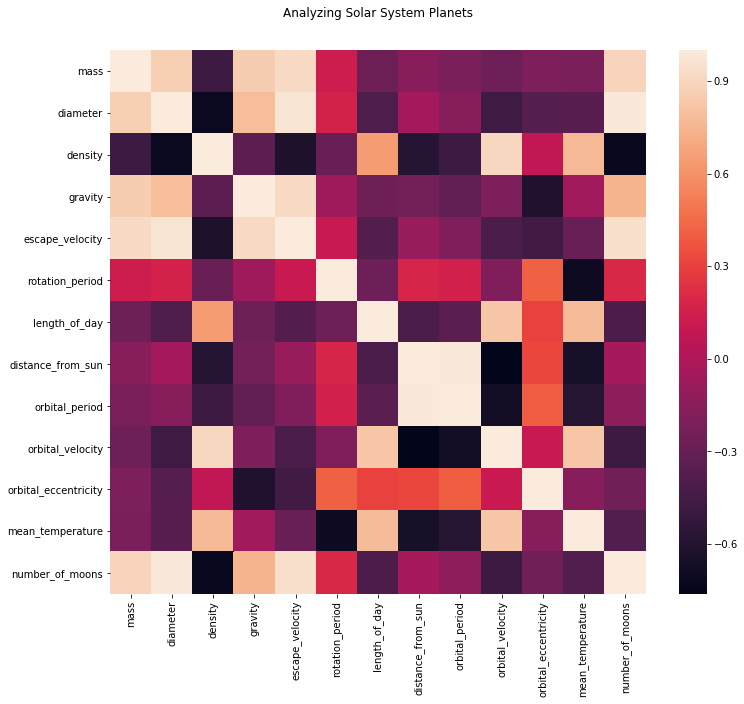

In [54]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('Analyzing Solar System Planets', y=1.05)
sns.heatmap(ax=ax, data=planets_subset_df.corr())

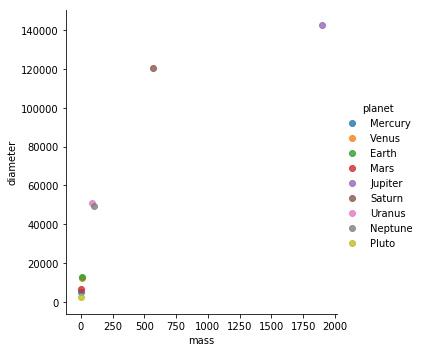

In [58]:
g = sns.lmplot(x="mass", y="diameter", hue="planet",
               truncate=True, height=5, data=planets_df)

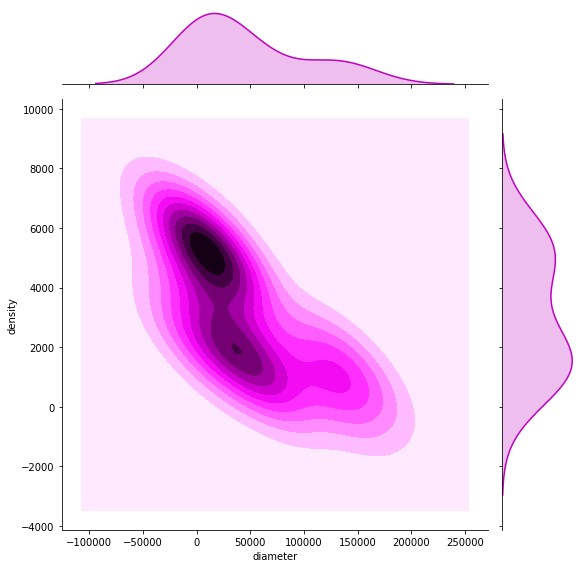

In [91]:
sns.jointplot(planets_df.diameter, planets_df.density, kind='kde', color="m", title='Hello', height = 8)

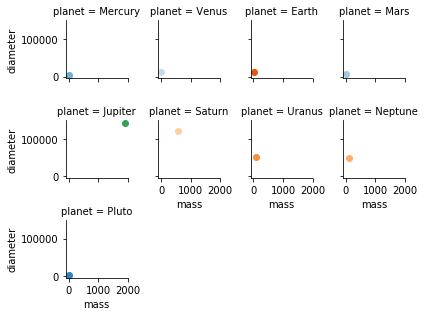

In [56]:
grid = sns.FacetGrid(planets_df, col="planet", hue="mass", palette="tab20c",
                     col_wrap=4, height=1.5)
grid.map(plt.plot, "mass", "diameter", marker="o")

In [29]:
satellites_df = pd.read_csv('data/satellites.csv')
satellites_df.head()

,planet,name,gm,radius,density,magnitude,albedo
0,Earth,Moon,4902.801±0.001,1737.5±0.1,3.344±0.005,-12.74,0.12
1,Mars,Phobos,0.0007112±0.0000010,11.1±0.15,1.872±0.076,11.4±0.2,0.071±0.012
2,Mars,Deimos,0.0000985±0.0000024,6.2±0.18,1.471±0.166,12.45±0.05,0.068±0.007
3,Jupiter,Io,5959.916±0.012,1821.6±0.5,3.528±0.006,5.02±0.03,0.63±0.02
4,Jupiter,Europa,3202.739±0.009,1560.8±0.5,3.013±0.005,5.29±0.02,0.67±0.03


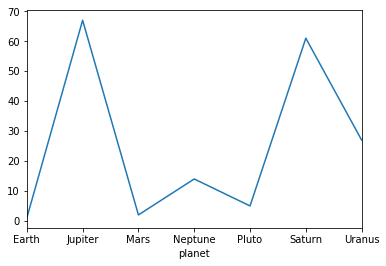

In [52]:
sat_planet_df = satellites_df.groupby('planet')
sat_planet_df['name'].count().plot()